In [1]:
!pip install ktrain
import ktrain
from ktrain import text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 33.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 41.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 44.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 38.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.38.0-py3-none-any.whl size=25319964 sha256=b92f

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
trainSet = pd.read_csv('/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Train.csv')
testSet =  pd.read_csv('/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Test.csv')

In [3]:
!pip install bnltk
!pip install bnlp-toolkit==4.0.0.dev4

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2959 sha256=52be962cf2272dd577c41e0a393da3c59bcd479e95f32cd584e2ed0c88466e9a
  Stored in directory: /root/.cache/pip/wheels/5b/f6/92/0173054cc528db7ffe7b0c7652a96c3102aab156a6da960387
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 40.8 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=b2c0a80393fc478e8dc4d86cdba19103492a62998894af09f41adc90e281cb88
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.8.0
    Uninstalling emoji-2.8.0:


In [4]:
#Tokenizer
from bnlp import NLTKTokenizer
bnltk = NLTKTokenizer()

#for Train Set
for i in range(0,trainSet.shape[0]):
    text = bnltk.word_tokenize(trainSet['Data'][i])
    trainSet['Data'][i] = str(text)
#For Test Set   
for i in range(0,testSet.shape[0]):
    text = bnltk.word_tokenize(testSet['Data'][i])
    testSet['Data'][i] = str(text)

In [5]:
!pip install BnLemma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.2 MB/s eta 0:00:00


In [6]:
import BnLemma as lm
bl = lm.Lemmatizer()

for i in range(0,trainSet.shape[0]):
    words = str(trainSet['Data'][i])
    trainSet['Data'][i] = bl.lemma(words)

for i in range(0,testSet.shape[0]):
    words = str(testSet['Data'][i])
    testSet['Data'][i] = bl.lemma(words)

In [7]:
from sklearn.model_selection import train_test_split
train = trainSet['Data'].values.tolist()
test = testSet['Data'].values.tolist()
train_cluster_id = trainSet['Label'].tolist()
test_cluster_id = testSet['Label'].tolist()

In [8]:
X_train = train
y_train = train_cluster_id
X_test = test
y_test = test_cluster_id

In [9]:
X_train

["মুগ্ধ 'হয়ে', 'গেলাম', 'মামু.', 'আর', 'তোমায়', 'কি', 'কমু.', 'বলো', 'তোমায়', 'কোথায়', 'পামু.', আমি তোমার সাথে 'যাবু.', গান 'কমু', তোমার 'মতো', 'গলি', 'ঘুরমু.']",
 "['এই', কুত্তা বাচ্চা জন্য 'দেশটা', 'আজ', এমন বস্তা 'এই', 'তিনটা', পুলিশ 'কে', 'তরে', সবার সামনে 'মেরে', 'পেলা', দরকার",
 "['ভাই', আপনার 'কথাই', 'যাদু', 'রয়েছে']",
 "['উওরটা', আমার অনেক ভাল 'লেগেছে']",
 "আমার 'নিজের', 'গাড়ী', 'নিয়ে', 'কি', 'সাজেক', যেতে 'পারবো', 'না', '?', প্রাইভেট 'কার', 'নিয়ে', '?']",
 "['যেমন', ':', পরীক্ষা রেজাল্ট সময় ',', বিভিন্ন 'ব্যানিজ্যিক', প্রচার ইত্যাদি",
 "['বিশ্বনন্দিত', বিশ্ব 'জয়', করা ইসলাম 'পাখিদের', 'কোরআনের', 'পাখিদের', কোন খবর নাই 'আরিফ', 'অব্যয়', বোদা 'বয়', 'সিঙ্গেল', 'বয়', জাতি 'হিসেবে', বাঙালি বর্তমান 'কত', 'মুরুক্ষ', 'এটা', 'তারই', প্রমাণ ঝাড় মার তোর কপাল",
 "['সাপ্তাহিক', 'মুসুল্লিদের', 'কথাটাও', 'তুলে', 'ধরলে', ভাই ',', চোখ 'খুলে', 'দিছো']",
 "['আমি', 'ভেবেছিলাম', 'গালিগালাজ', 'করে', সেরা ছেলে 'সে', '?', 'গালিবয়']",
 "তুমি 'রেপারই', 'হও', ',', ডাক্তার হওয়া দরকার নাই তোমার",
 "

In [10]:
import ktrain
from ktrain import text
MODEL_NAME = 'xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [11]:

y_train = [str(x) for x in train_cluster_id]
y_test = [str(x) for x in test_cluster_id]


In [12]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 15
	95percentile : 37
	99percentile : 47


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 15
	95percentile : 36
	99percentile : 45


In [13]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=10)
history = learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1258/1258 [==============================] - 967s 751ms/step - loss: 0.9771 - accuracy: 0.5277 - val_loss: 0.8470 - val_accuracy: 0.6248
Epoch 2/10
1258/1258 [==============================] - 939s 746ms/step - loss: 0.8326 - accuracy: 0.6287 - val_loss: 0.8057 - val_accuracy: 0.6557
Epoch 3/10
1258/1258 [==============================] - 938s 746ms/step - loss: 0.7718 - accuracy: 0.6608 - val_loss: 0.7579 - val_accuracy: 0.6551
Epoch 4/10
1258/1258 [==============================] - 939s 746ms/step - loss: 0.7003 - accuracy: 0.6981 - val_loss: 0.7516 - val_accuracy: 0.6677
Epoch 5/10
1258/1258 [==============================] - 938s 746ms/step - loss: 0.6405 - accuracy: 0.7315 - val_loss: 0.7399 - val_accuracy: 0.6854
Epoch 6/10
1258/1258 [==============================] - 939s 746ms/step - loss: 0.5650 - accuracy: 0.7658 - val_loss: 0.7671 - val_accuracy: 0.6961
Epoch 7/10
1258/1258 [===========================

In [14]:
learner.validate(class_names=t.get_classes()) 

50/50 [==============================] - 16s 265ms/step
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       361
           1       0.76      0.77      0.76       654
           2       0.78      0.79      0.79       571

    accuracy                           0.72      1586
   macro avg       0.69      0.69      0.69      1586
weighted avg       0.71      0.72      0.71      1586



array([[179, 110,  72],
       [ 96, 502,  56],
       [ 66,  52, 453]])

In [15]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

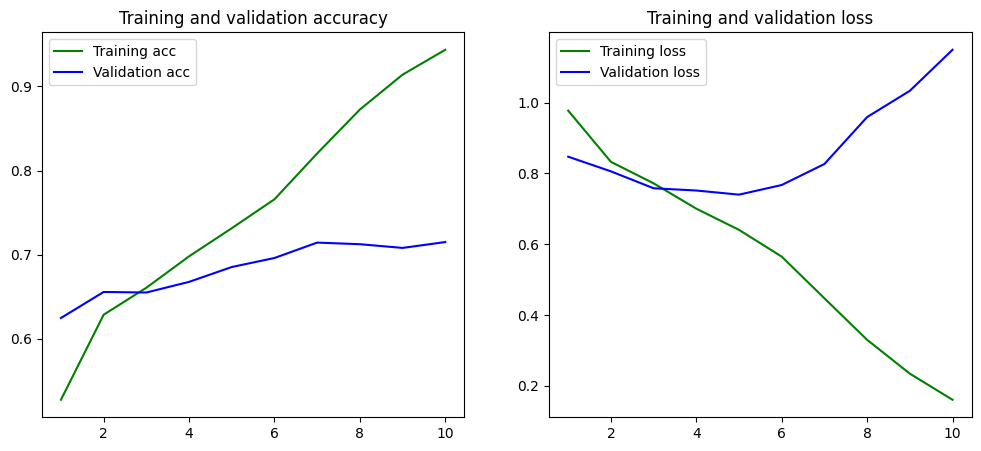

In [16]:
PlotGraph(history)